In [1]:
import numpy as np
import sys
sys.path.append('./')
from vis_tools.engine import Detector

/data/yyang/miniconda3/envs/magiclidar/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import cv2
import matplotlib.pyplot as plt
def draw_boxes_on_image(image, gt_boxes, pred_boxes):
    """
    Draws ground truth and predicted boxes on the input image.

    Parameters:
        image (np.array): The input image as a NumPy array (e.g., read by cv2.imread).
        gt_boxes (list or np.array): List/array of ground truth boxes in [x_min, y_min, x_max, y_max] format.
        pred_boxes (list or np.array): List/array of predicted boxes in [x_min, y_min, x_max, y_max] format.
    
    Returns:
        np.array: A copy of the input image with drawn boxes.
    """
    # Make a copy of the image to avoid modifying the original
    image_copy = image.copy()
    
    # Draw ground truth boxes in green
    for box in gt_boxes:
        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)
    
    # Draw predicted boxes in red
    for box in pred_boxes:
        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), color=(0, 0, 255), thickness=2)
    
    return image_copy

In [3]:
detector = Detector()

/data/yyang/miniconda3/envs/magiclidar/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/yyang/miniconda3/envs/magiclidar/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint o

Initializing Talk2EventDataset
missing 83 attributes
load 7560 data from test split
false match 33 attributes


In [4]:
index = 6000
outputs, image_path, caption, gt_box, pred_boxes, targets = detector.infrence(index)

torch.Size([480, 640])


/data/yyang/miniconda3/envs/magiclidar/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
gt_box

array([[235.     , 197.     , 295.     , 243.00002]], dtype=float32)

In [6]:
img = cv2.imread(image_path)
# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_copy = draw_boxes_on_image(img, gt_box, pred_boxes)

(-0.5, 639.5, 479.5, -0.5)

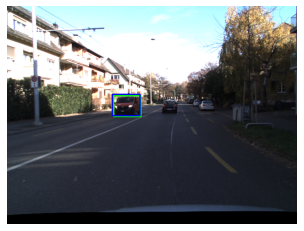

In [7]:
plt.imshow(image_copy)
plt.axis('off')

In [8]:
caption

'on the left side of the road , a red , boxy car moves slowly or is parked , near a hedge and a street sign . it faces the viewer , with other vehicles visible down the road .. not mentioned'

In [9]:
pred_boxes

array([[232.55612, 194.22113, 293.8932 , 241.86938]], dtype=float32)

In [10]:
gt_box

array([[235.     , 197.     , 295.     , 243.00002]], dtype=float32)

In [11]:
targets

{'boxes': tensor([[0.4141, 0.4583, 0.0938, 0.0958]], device='cuda:0'),
 'labels': tensor([2], device='cuda:0'),
 'caption': 'on the left side of the road , a red , boxy car moves slowly or is parked , near a hedge and a street sign . it faces the viewer , with other vehicles visible down the road .. not mentioned',
 'tokens_positive': [[(48, 60), (67, 73)]],
 'positive_map': tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3333, 0.3333, 0.0000,
          0.0000, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,